$$\require{mhchem}$$
# Test case - $\ce{LiFeSO4F}$

Here we use M3GNet to search for low energy $\ce{LiFeSO4F}$ structures. 
The DFT results have been previously published here: https://aip.scitation.org/doi/full/10.1063/5.0076220.


The search for $\ce{LiFeSO4F}$ is more challenging than $\ce{LiFePO4}$ for M3GNet, becuase the Materials Project database does not have extensive data on the low energy polymorphs.
The work work above, we have found several new polymorphs which are not present in the Materials Project database.


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

import warnings
from pathlib import Path
from ase.io import read
import ase
# from m3gnet.models import Relaxer
# from pymatgen.ext.matproj import MPRester
from pymatgen.core import Structure

import pandas as pd

from tqdm import tqdm
tqdm = lambda x: x

## Loading data

In [2]:
lifeso4f_mp = Structure.from_file("LiFeSO4F-mp-943492.vasp")

In [3]:
lifeso4f_mp_relaxed = read("exp-m3gnet/LiFeSO4F-mp-943492.res")
lifeso4f_mp_relaxed_energy = lifeso4f_mp_relaxed.info['energy']  / len(lifeso4f_mp_relaxed)
lifeso4f_mp_relaxed_volume = lifeso4f_mp_relaxed.get_volume() / len(lifeso4f_mp_relaxed)

In [4]:
def load_dataset(names):
    cells = [read(x) for x in  tqdm(names)]
    for atoms, name in zip(cells, input_names):
        atoms.info['fname'] = name.stem

    dataset = []
    for atoms in cells:
        dataset.append(
        {
            'atoms': atoms,
            'label': atoms.info['fname'],
            'energy': atoms.info['energy'],
            'energy_per_atom': atoms.info['energy'] / len(atoms),
            'volume': atoms.get_volume(),
            'volume_per_atom': atoms.get_volume() / len(atoms),

        }
        )

    return pd.DataFrame(dataset).sort_values('energy_per_atom')

Load calculated data

In [5]:
input_names = list(Path("LiFeSO4F-run1").glob("*.res"))
df_dft = load_dataset(input_names)

In [6]:
input_names = list(Path("LiFeSO4F-run1-m3gnet").glob("*.res"))
df_m3g = load_dataset(input_names)

In [7]:
input_names = list(Path("LiFeSO4F-relaxed-m3gnet").glob("*.res"))
df_relaxed_m3g = load_dataset(input_names)

## Low energy structure

Plot the energy and volume of the low energy structure found by the search

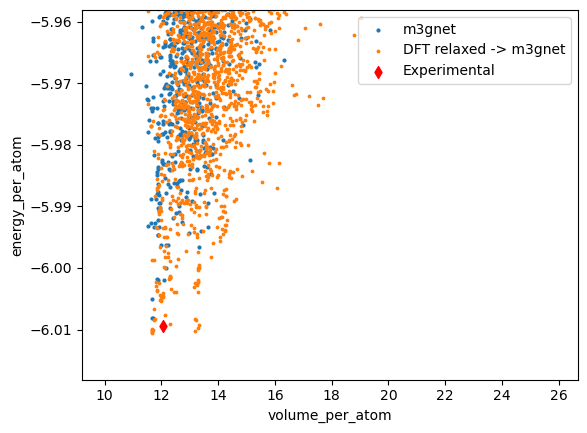

In [8]:
ax = df_m3g.plot.scatter('volume_per_atom', 'energy_per_atom', label='m3gnet', s=4)
ax = df_relaxed_m3g.plot.scatter('volume_per_atom', 'energy_per_atom', label='DFT relaxed -> m3gnet', ax=ax, color='C1', s=3)
ax.scatter( [lifeso4f_mp_relaxed_volume], [lifeso4f_mp_relaxed_energy],  marker='d', color='r', label='Experimental')
min_eng = df_m3g.energy_per_atom.min()
#ax.set_xlim(10, 15)
ax.set_ylim(min_eng-0.01, min_eng+ 0.05)
ax.legend(loc=1)

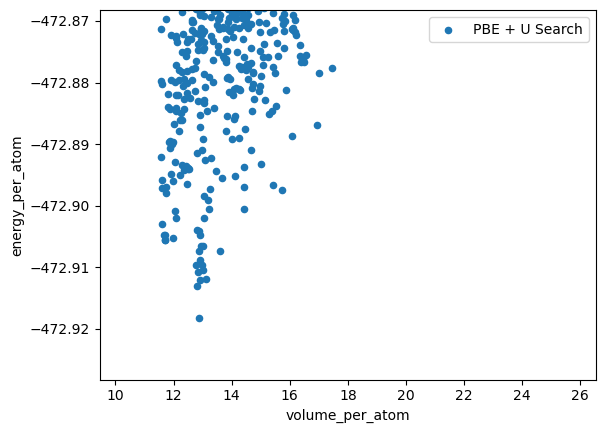

In [9]:
ax = df_dft.plot.scatter('volume_per_atom', 'energy_per_atom', 
                         #xlim=(9, 14), ylim=(-434, -433.75), 
                         label='PBE + U Search')
min_eng = df_dft.energy_per_atom.min()
ax.set_ylim(min_eng-0.01, min_eng+ 0.05)

ax.legend(loc=1)

Top structure found in each case:

In [10]:
df_dft.iloc[:3]

atoms  \
3018  (Atom('Li', [2.059504020548763, -1.98859034554...   
3164  (Atom('Li', [-1.5226934928220406, -0.933181268...   
2308  (Atom('Li', [1.506788176531176, 2.578680510737...   

                               label      energy  energy_per_atom      volume  \
3018  2LiFeSO4F-200804-034722-678938 -7566.69161      -472.918226  206.246318   
3164  2LiFeSO4F-200804-022644-43b3f4 -7566.60922      -472.913076  204.850115   
2308  2LiFeSO4F-200804-022154-9da9fb -7566.59285      -472.912053  206.697060   

      volume_per_atom  
3018        12.890395  
3164        12.803132  
2308        12.918566

In [11]:
df_relaxed_m3g.iloc[:5]

atoms  \
3092  (Atom('Li', [-4.040317086726308, 1.32106399150...   
1536  (Atom('Li', [2.1532730716003248, 2.26455243755...   
2838  (Atom('Li', [2.581405187021502, -0.07824537357...   
3018  (Atom('Li', [1.9857412726393426, -2.0377037880...   
120   (Atom('Li', [2.1975093962436243, 2.15060793465...   

                               label    energy  energy_per_atom      volume  \
3092  2LiFeSO4F-200818-173807-f55f90  -96.1692        -6.010575  186.573736   
1536  4LiFeSO4F-200804-093629-270f26 -192.3336        -6.010425  373.230599   
2838  2LiFeSO4F-200804-043547-80a807  -96.1644        -6.010275  186.725737   
3018  2LiFeSO4F-200804-034722-678938  -96.1630        -6.010187  210.991581   
120   2LiFeSO4F-200819-000200-50146f  -96.1623        -6.010144  186.818119   

      volume_per_atom  
3092        11.660858  
1536        11.663456  
2838        11.670359  
3018        13.186974  
120         11.676132

In [12]:
df_m3g.iloc[:5]

atoms  \
1932  (Atom('Li', [1.3735649173482027, -1.3091754241...   
2838  (Atom('Li', [2.6514121507508763, 0.08089966622...   
1755  (Atom('Li', [1.4096927825611902, -1.3846909426...   
1468  (Atom('Li', [-1.7653730722637455, 1.6448893698...   
120   (Atom('Li', [2.5749066880092033, 2.11354669305...   

                               label   energy  energy_per_atom      volume  \
1932  2LiFeSO4F-200804-055229-a4aef3 -96.1300        -6.008125  186.933079   
2838  2LiFeSO4F-200804-043547-80a807 -96.1298        -6.008113  187.268464   
1755  2LiFeSO4F-200818-200625-fa2e89 -96.0803        -6.005019  186.519101   
1468  2LiFeSO4F-200804-031846-78332d -96.0316        -6.001975  193.350160   
120   2LiFeSO4F-200819-000200-50146f -96.0316        -6.001975  189.802136   

      volume_per_atom  
1932        11.683317  
2838        11.704279  
1755        11.657444  
1468        12.084385  
120         11.862633

## Comments

Search using M3GNet for relaxation is not able to reproduce the DFT results. 
However, M3GNet does give a reasonable good description for the low energy structures. In particular, the DFT lowest energy strucure `678938` is also found to be one of the lowest energy structure.

Intestingly, *f55f90* (in `df_relaxed_m3g`) and *a4aef3* in (`df_m3g`) has almost the same structure but hte energies are different by 2 meV and almost identical structures have been found for them separately.  

Could this indicate that the potential energy of M3GNet is slightly rugged with smaller basins? 

## Density of structures distribution

In [13]:
import matplotlib.pyplot as plt

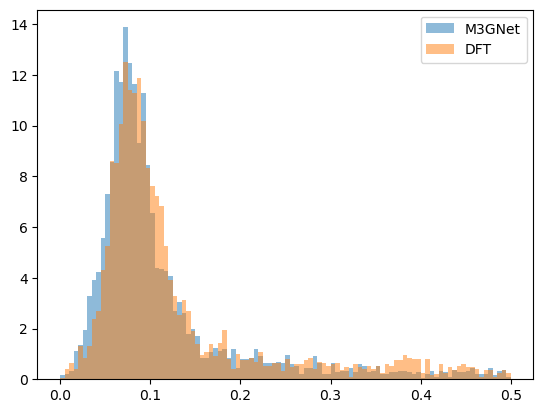

In [14]:
engs = df_m3g['energy_per_atom'].values.copy()
engs_m3g = engs - lifeso4f_mp_relaxed_energy
engs = df_dft['energy_per_atom'].values.copy()
engs_dft = engs - engs.min()

plt.hist(engs_m3g, bins=100,alpha=0.5, density=True, range=(0, 0.5), label='M3GNet');
plt.hist(engs_dft, bins=100, alpha=0.5, density=True, range=(0, 0.5), label='DFT');
plt.legend()

## Concluding remark

Reproducing the DFT search results using M3GNet appears to be more challenging for $\ce{LiFeSO4F}$.
In particular, the polymorphs with silimanite ordering appears to be completely missing.  

However, M3GNet does give good descriptions of their energies as re-relaxing the DFT structures result in one of the lowest energy structures.
This suggest that M3GNet does well when interpolating - even if there are little $\ce{LiFeSO4F}$ data in the training set, there are plenty of training data in the composition space of Li-Fe-S-O-F.
